In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

C:\Users\student\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                   cancer.target,
                                                   random_state=0)

svc = SVC() 
svc.fit(X_train, y_train)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
svc.score(X_train, y_train), svc.score(X_test, y_test)

(1.0, 0.6293706293706294)

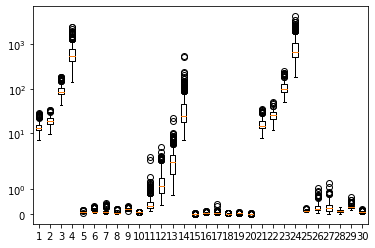

In [8]:
import matplotlib.pyplot as plt 

plt.boxplot(X_train)
plt.yscale('symlog')
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
X_train_scaled = m.fit_transform(X_train)
X_test_scaled = m.transform(X_test)

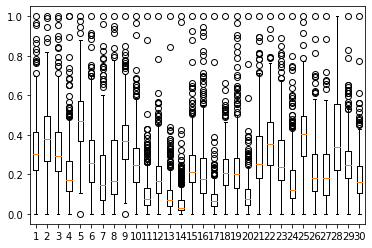

In [11]:
plt.boxplot(X_train_scaled)
plt.show()

In [14]:
svc = SVC(gamma='scale')
svc.fit(X_train_scaled, y_train)
svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)

(0.9835680751173709, 0.972027972027972)

In [17]:
svc = SVC(gamma=0.01, C=1000)  
svc.fit(X_train_scaled, y_train)
svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)

(0.9859154929577465, 0.9790209790209791)

### 최적의 하이퍼 파라미터를 찾기 

In [18]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_list = {'gamma':[0.1, 1, 5, 10, 100],
              'C':[0.1, 1, 5, 10,38.5,100]}
gs = GridSearchCV(svc, param_list, cv=5)
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 10, 38.5, 100],
                         'gamma': [0.1, 1, 5, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
gs.best_params_

{'C': 1, 'gamma': 1}

In [39]:
gs.best_score_  # 학습데이터의 성능 

0.9812206572769953

In [40]:
gs.best_estimator_    #모델 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
gs.score(X_test_scaled, y_test)

0.972027972027972

In [42]:
import pandas as pd
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004369,0.000484,0.001212,0.000404,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.883721,0.883721,0.894118,0.917647,0.916667,0.899061,0.015163,23
1,0.002988,0.000896,0.000808,0.000762,0.1,1,"{'C': 0.1, 'gamma': 1}",0.895349,0.965116,0.941176,0.952941,0.976190,0.946009,0.028030,12
2,0.003990,0.000002,0.000996,0.000003,0.1,5,"{'C': 0.1, 'gamma': 5}",0.918605,0.965116,0.917647,0.917647,1.000000,0.943662,0.033401,13
3,0.004789,0.000397,0.000994,0.000003,0.1,10,"{'C': 0.1, 'gamma': 10}",0.627907,0.627907,0.623529,0.635294,0.630952,0.629108,0.003886,24
4,0.005984,0.000003,0.001196,0.000399,0.1,100,"{'C': 0.1, 'gamma': 100}",0.627907,0.627907,0.623529,0.623529,0.630952,0.626761,0.002857,25
5,0.001997,0.000003,0.000796,0.000398,1,0.1,"{'C': 1, 'gamma': 0.1}",0.930233,0.976744,0.941176,0.964706,0.976190,0.957746,0.018900,9
6,0.001796,0.000397,0.000200,0.000399,1,1,"{'C': 1, 'gamma': 1}",0.976744,0.976744,0.952941,1.000000,1.000000,0.981221,0.017538,1
7,0.002990,0.000004,0.000999,0.000002,1,5,"{'C': 1, 'gamma': 5}",0.965116,0.965116,0.941176,0.964706,0.940476,0.955399,0.011819,10
8,0.005385,0.000489,0.000996,0.000002,1,10,"{'C': 1, 'gamma': 10}",0.953488,0.930233,0.905882,0.952941,0.928571,0.934272,0.017737,18
9,0.007373,0.000484,0.001204,0.000416,1,100,"{'C': 1, 'gamma': 100}",0.627907,0.627907,0.623529,0.623529,0.630952,0.626761,0.002857,25


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 50, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=1)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=1,
                                            shrinking=True, to...
             iid='warn', n_jobs=1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0

In [62]:
gs.best_params_

{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

In [63]:
gs.best_score_

0.9859154929577465

In [64]:
gs.score(X_test, y_test)

0.9790209790209791